# Одномерная линейная регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class SimpleLinearRegression:
    #
    def fit(self, X, Y):
        S12 = S21 = np.mean(X)
        S11 = np.mean(X*X)
        S22 = 1
        Y1 = np.mean(X*Y)
        Y2 = np.mean(Y)
        D = S11*S22 - S12*S21
        assert D != 0
        a = (S22*Y1 - S12*Y2) / D
        b = (S11*Y2 - S21*Y1) / D
        self.a = a
        self.b = b
    #
    def evaluate(self, X):
        return self.a * X + self.b
        

Рассмотрим приближенную линейную функцию $y=2x-1+\varepsilon(x)$. 

Задаем случайный массив $X$ значений на отрезке $[-1,1)$:

In [20]:
N = 100
X = 2*np.random.random(N) - 1

In [21]:
Y0 = 2 * X -1

Добавим случайную ошибку со значениями $[-0.5, 0.5)$:

In [22]:
E = (2*np.random.random(N) - 1) * 0.5 
Y = Y0 + E

In [23]:
temp_x = 1 + 0.25 * np.random.random(10)
temp_y = -2 + 0.25 * np.random.random(10)

In [24]:
temp = X
X = np.empty(N+10, 'd')
X[:N] = temp[:]
X[N:] = temp_x

In [25]:
temp = Y
Y = np.empty(N+10, 'd')
Y[:N] = temp[:]
Y[N:] = temp_y

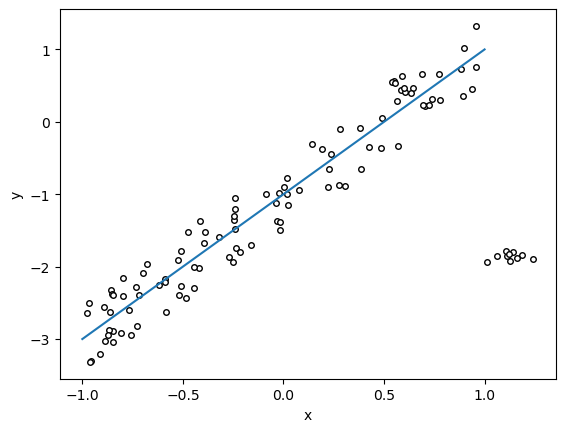

In [26]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
slr = SimpleLinearRegression()

In [28]:
slr.fit(X, Y)
print(slr.a, slr.b)

1.3032199752540348 -1.2916718010474593


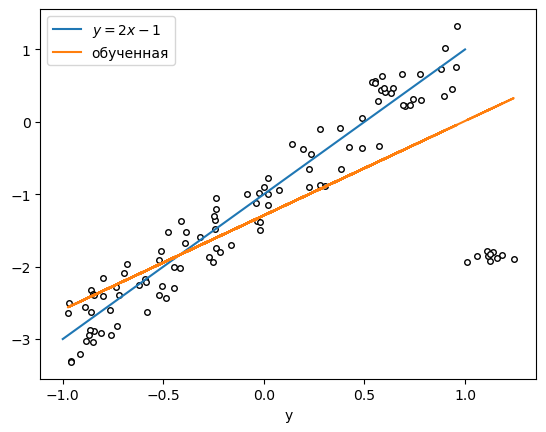

In [29]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1], label=r'$y=2x-1$')
plt.xlabel('x')
plt.xlabel('y')
plt.plot(X, slr.evaluate(X), label='обученная')
plt.legend()
plt.show()

In [30]:
E = abs(Y - slr.evaluate(X))

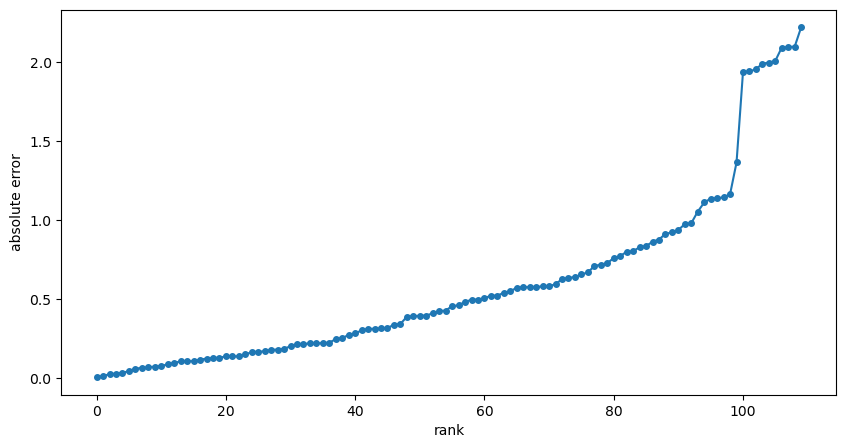

In [38]:
plt.figure(figsize=(10,5))
plt.plot(sorted(E), marker='o', markersize=4)
plt.xlabel('rank')
plt.ylabel('absolute error')
plt.show()

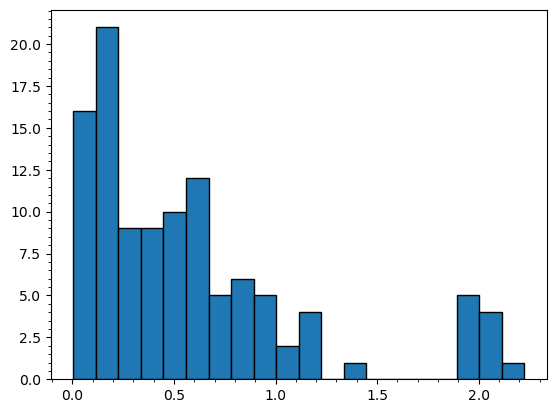

In [33]:
plt.hist(E, bins=20, edgecolor='k')
plt.minorticks_on()
plt.show()

In [45]:
I = np.argsort(E)
I1 = I[:-10]

In [47]:
X1 = X[I1]
Y1 = Y[I1]

In [42]:
slr1 = SimpleLinearRegression()
slr1.fit(X1, Y1)

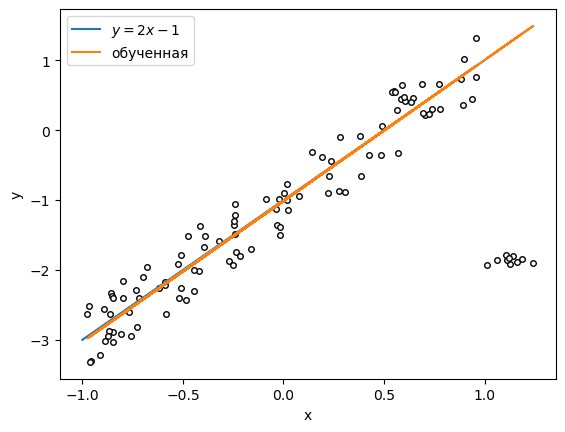

In [44]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1], label=r'$y=2x-1$')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, slr1.evaluate(X), label='обученная')
plt.legend()
plt.show()

In [53]:
E1 = abs(Y - slr1.evaluate(X))

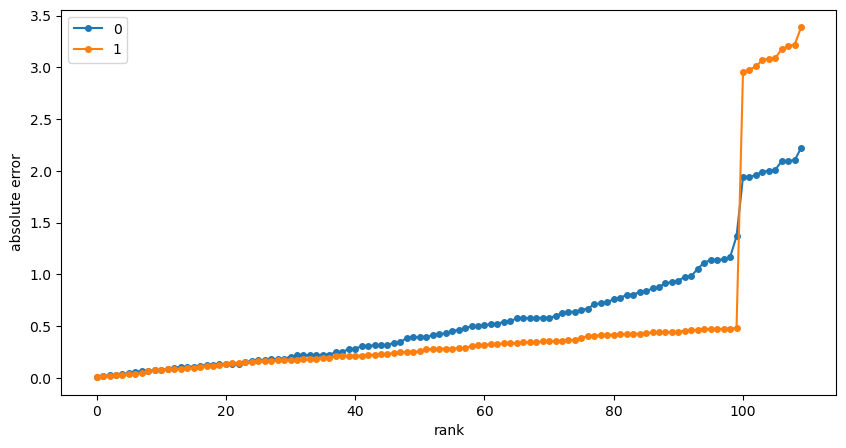

In [55]:
plt.figure(figsize=(10,5))
plt.plot(sorted(E), marker='o', markersize=4, label='0')
plt.plot(sorted(E1), marker='o', markersize=4, label='1')
plt.xlabel('rank')
plt.ylabel('absolute error')
plt.legend()
plt.show()

In [48]:
df = pd.read_csv("data/animals.csv", sep=',')
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [49]:
body = df["body"].values
brain = df["brain"].values

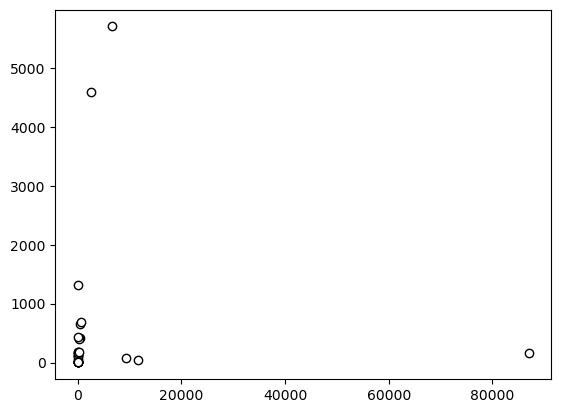

In [50]:
plt.scatter(body, brain, s=36, c='w', edgecolors='k')
plt.show()

In [51]:
body_log = np.log(body)
brain_log = np.log(brain)

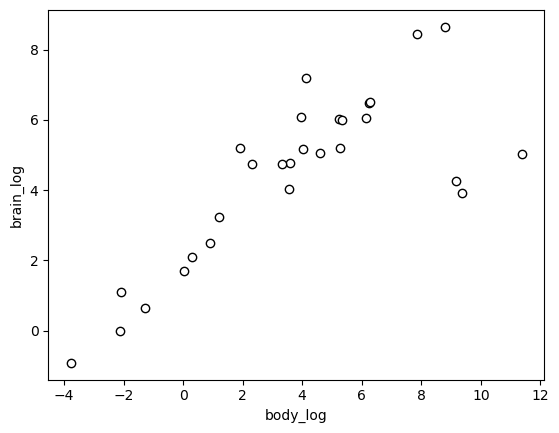

In [52]:
plt.scatter(body_log, brain_log, s=36, c='w', edgecolors='k')
plt.xlabel('body_log')
plt.ylabel('brain_log')
plt.show()